# Capstone: Job Classificatio(Data Scientist)

### Data Set Cleaning and pre-processing Initial Exploration

### Anshu

## Problem Statement:

Job classification is the process to determine the relative rank of different jobs in an organization. This is important since the hierarchical position a job is classified as underlies many HR decisions. A good job classification leads to fair, equitable,senior jobs have higher requirements in terms of performance and capabilities, and enables succession planning to more senior roles.Classification involves taking the characteristics of a job and categorizing it based on the classifications, input which we will take is the job description.

Data science has been called “the sexiest job of the 21st century” — more business leaders in all industry are hiring data scientists into environments where we can be effective. 
Data Science team has been asked to classify the Data Scientist job based on the senority. The job description of 10,000 Data Scientist role has been provided to understand what could be the key terms should be mentioned on Data Scientist position. What all are the overlaps and differences in the Job description. Topic modelling has also been performed to understand the key topics in the job description. 

## EXECUTIVE SUMMARY 

Data Science is a new field and there is an influx of talent in this field generated by range of training and courses offered by both academic and professional institutions. Data Science needs of the organizations, and hence the talent and experience requirements, also vary at different level of jobs.

The Data Science Skills Matrix
A Data Scientist is expected to have knowledge in three areas: Statistics, Engineering, and Business. However, you’re not expected to master all three areas right from the get-go. Which skills should you focus on when seeking an entry-level position? Which skills become more important as you progress through the career ladder?
- Junior Data Scientists don’t have experience in engineering complex product solutions.Hence,     they are not expected to come up with new products to impact the Fundamental Business Equation.
- Mid -Senior Data Scientists should be able to frame Data Science problems. Good candidates have    great insights from past Data Science experiences.They are focussing more of product     development
- Manager/Director Data Scientist should be able to understand the product life cycle and focus more on managing client expectations. 

### Contents:

- [Data Dictionary]()
- [Data Import and Cleaning]()
- [Exploratory Data Analysis]() 
- [EDA TEXT_DATA]()
- [Modeling and summary]()
- [Conclusions and Recommendations]()

## Data Dictionary

[**Data set was taken from Dataworld website**](https://data.world/jobspikr/10000-data-scientist-job-postings-from-the-usa).

|Feature|Variable type||Description|
|:----|:---|:---|:---|
|0   |crawl_timestamp |      10000 non-null|  object |
| 1  | url             |      10000 non-null|  object |
| 2  | job_title       |      10000 non-null|  object |
|3 |category          |    9118 non-null  | object |
|4  | company_name      |    9999 non-null  | object |
|5   |city              |    9751 non-null  | object |
| 6  | state            |     9584 non-null |  object| 
| 7  | country          |     10000 non-null | object| 
| 8   |inferred_city    |     8980 non-null  | object |
| 9   |inferred_state   |     9484 non-null |  object |
| 10  |inferred_country |     9505 non-null |  object |
| 11  |post_date        |     10000 non-null | object |
| 12  |job_description |      10000 non-null | object |
|13  |job_type         |     10000 non-null | object |
|14  |salary_offered   |     597 non-null   | object |
| 15 | job_board       |      9310 non-null |  object| 
| 16 | geo             |      9300 non-null |  object| 
| 17  |cursor          |      10000 non-null|  int64  |
| 18  |contact_email  |       0 non-null     | float64|
| 19  |contact_phone_number | 416 non-null   | object |
| 20  |uniq_id             |  10000 non-null | object |
| 21  |html_job_description | 1599 non-null  | object |


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for word analysis in job title and description
import re
pd.set_option("display.max_colwidth", 100)
pd.set_option('max_columns', 400)
pd.set_option('max_rows', 400)
from nltk.stem.porter import PorterStemmer
# Instantiate Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer>
lemmatizer = WordNetLemmatizer()

In [3]:
df = pd.DataFrame(pd.read_csv('./dataset/data_scientist_us_dataset.csv'))
df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23438c,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Luxoft-USA-Inc-Middletown-NJ-07748/newageny/802263,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical b...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Cincinnati-Bell-Technology-Solutions-New-York-NY...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,"Candidates should have the following background, skills and characteristics: Experience develop...",Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead205f2,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-scientist-charlotte-nc-us-cybercoders/205114316,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare ...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [4]:
# Data set exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crawl_timestamp       10000 non-null  object 
 1   url                   10000 non-null  object 
 2   job_title             10000 non-null  object 
 3   category              9118 non-null   object 
 4   company_name          9999 non-null   object 
 5   city                  9751 non-null   object 
 6   state                 9584 non-null   object 
 7   country               10000 non-null  object 
 8   inferred_city         8980 non-null   object 
 9   inferred_state        9484 non-null   object 
 10  inferred_country      9505 non-null   object 
 11  post_date             10000 non-null  object 
 12  job_description       10000 non-null  object 
 13  job_type              10000 non-null  object 
 14  salary_offered        597 non-null    object 
 15  job_board           

In [5]:
# Checking the null values
df.isnull().sum()

crawl_timestamp             0
url                         0
job_title                   0
category                  882
company_name                1
city                      249
state                     416
country                     0
inferred_city            1020
inferred_state            516
inferred_country          495
post_date                   0
job_description             0
job_type                    0
salary_offered           9403
job_board                 690
geo                       700
cursor                      0
contact_email           10000
contact_phone_number     9584
uniq_id                     0
html_job_description     8401
dtype: int64

In [6]:
# Filter the relevant features
df = df[['post_date','job_title','company_name','city','state','job_description','job_board','category','job_type']]

In [7]:
#decided to drop null values
df.dropna(axis=0, inplace=True)

In [8]:
# recheck the null values
df.isnull().sum()

post_date          0
job_title          0
company_name       0
city               0
state              0
job_description    0
job_board          0
category           0
job_type           0
dtype: int64

In [9]:
df.shape

(8079, 9)

In [10]:
# Finding the duplicates
len(df[df.duplicated(subset=None)]['job_description'])

84

In [11]:
df.shape

(8079, 9)

In [12]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [13]:
# checking the rows after dropping duplicates
df.shape

(7995, 9)

In [14]:
# Keeping a copy of dataset
df1=df.copy()

## 2.  Cleaning the data 

In [15]:
# checking the value counts of states
df['state'].value_counts

<bound method IndexOpsMixin.value_counts of 0                            CA
3       NY 10055 (Midtown area)
4                            NC
5       NY 10179 (Midtown area)
6       NY 10011 (Chelsea area)
                 ...           
9988                         CA
9989       Computer-or-internet
9990       Computer-or-internet
9991       Computer-or-internet
9992                         OR
Name: state, Length: 7995, dtype: object>

In [16]:
# Cleaning of the state column 
df['state'] = df['state'].apply(lambda x: x.split()[0])

In [17]:
# There are 50 states in US, whereas unique values in our dataset are 61, need to remove the outliers
df['state'].nunique()

61

In [18]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [19]:
df_state = pd.DataFrame(data={'state': ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]})

In [20]:
df_filter = df[~df['state'].isin(states)]

In [21]:
df_filter['state'].value_counts()

United                         73
Computer-or-internet           18
Remote                         14
Virginia                        6
New                             5
Work                            2
Idaho                           2
PR                              2
Hawaii                          2
Engineering-or-architecture     1
Washington                      1
Louisiana                       1
Massachusetts                   1
Name: state, dtype: int64

In [22]:
# Imputating the wrong inputs to US
df['state'].replace(to_replace = ['United','Computer-or-internet','Remote','Engineering-or-architecture','Work'],value ='US',inplace=True)

In [23]:
# Imputate the other states with the right abbreviations
df['state'].replace(to_replace = ['Virginia'],value='VA',inplace=True)
df['state'].replace(to_replace = ['Hawaii'],value='HI',inplace=True)
df['state'].replace(to_replace = ['Washington'],value='WA',inplace=True)
df['state'].replace(to_replace = ['Idaho'],value='ID',inplace=True)
df['state'].replace(to_replace = ['Massachusetts'],value='MA',inplace=True)
df['state'].replace(to_replace = ['Louisiana'],value='LA',inplace=True)

In [24]:
df['state'].nunique()

51

In [25]:
df.head()

,post_date,job_title,company_name,city,state,job_description,job_board,category,job_type
0,2019-02-06,Enterprise Data Scientist I,Farmers Insurance Group,Woodland Hills,CA,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,indeed,Accounting/Finance,Undefined
3,2019-02-06,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",BlackRock,New York,NY,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,indeed,Accounting/Finance,Undefined
4,2019-02-05,Senior Data Scientist,CyberCoders,Charlotte,NC,We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare ...,monster,biotech,Full Time
5,2019-02-05,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,JP Morgan Chase,New York,NY,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,indeed,Accounting/Finance,Undefined
6,2019-02-06,"Data Scientist, Licensing Operations",Spotify,New York,NY,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,indeed,Accounting/Finance,Undefined


In [27]:
# Category column exploration 
df['category'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Accounting/Finance
3                Accounting/Finance
4                           biotech
5                Accounting/Finance
6                Accounting/Finance
                   ...             
9988                  computer jobs
9989           Computer-or-internet
9990           Computer-or-internet
9991           Computer-or-internet
9992    Engineering-or-architecture
Name: category, Length: 7995, dtype: object>

In [40]:
# Merging classes to reduce number of catergories

df.loc[df['category']=='Computer-or-internet', 'category'] = 'Computer/Internet'
df.loc[df['category']=='computer jobs', 'category'] = 'Computer/Internet'
df.loc[df['category']=='technology', 'category'] = 'Computer/Internet'

df.loc[df['category'].str.contains('Data Scientist'), 'category'] = 'Data Scientist'


df.loc[df['category']=='Manufacturing-or-mechanical', 'category'] = 'Manufacturing/Mechanical'

df.loc[df['category']=='Engineering-or-architecture', 'category'] = 'Engineering/Architecture'
df.loc[df['category']=='architecture and engineering', 'category'] = 'Engineering/Architecture'

df.loc[df['category']=='administrative jobs', 'category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Administrative', 'category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Human-Resources','category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Human+Resources','category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Customer-Service','category'] = 'Admin/HR/Sale/Customer'
df.loc[df['category']=='Sales', 'category'] = 'Admin/HR/Sale/Customer'

df.loc[df['category']=='life physical and social science', 'category'] = 'Life/Social Science'
df.loc[df['category']=='social science jobs', 'category'] = 'Life/Social Science'
df.loc[df['category']=='life science jobs', 'category'] = 'Life/Social Science'

df.loc[df['category']=='Accounting/Finance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Accounting-or-finance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='business and financial operations', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Insurance', 'category'] = 'Accounting/Finance/Insurance/loans'
df.loc[df['category']=='Banking-or-loans', 'category'] = 'Accounting/Finance/Insurance/loans'

df.loc[df['category']=='math jobs', 'category'] = 'Mathematics/Statistics'

In [41]:
# drop the category less than 30
df = df.groupby('category').filter(lambda x : len(x)>100) # Drop classes having row count less then 30

In [42]:
len(df['category'].unique())

7

In [43]:
df['category'].value_counts()

Computer/Internet                     2839
Engineering/Architecture              1118
Accounting/Finance/Insurance/loans     941
Life/Social Science                    849
Manufacturing/Mechanical               779
Admin/HR/Sale/Customer                 400
Statistics/Math                        391
Name: category, dtype: int64

## 3.  Exploratory Data Analysis


- Which industry has the highest number of Data Science jobs?
- Which companies are hiring the most Data Scientist?
- Which city and state hiring the Data Scientist?
- Which are the commom job boards for Data Scientists positions?
- Position are varied from to another, the following code block will industry and states

In [44]:
# Datafram of catrgory
data1 = pd.DataFrame(df['category'].value_counts())
data1

,category
Computer/Internet,2839
Engineering/Architecture,1118
Accounting/Finance/Insurance/loans,941
Life/Social Science,849
Manufacturing/Mechanical,779
Admin/HR/Sale/Customer,400
Statistics/Math,391


In [93]:
import plotly.express as px
fig = px.bar(data1,y='category')
fig.update_layout(title = 'Percentage of Different Sectors')

### Top 5 industries hiring for Data scientist:
- Computer/Internet 
- Engineering/Architecture 
- Accounting/Finance  
- Life/Social Science
- Manufacturing/Mechanical
- Admin/HR/Sales/Customer
- Statistics/Maths

In [52]:
# Shape of the dataframe
df.shape

(7317, 9)

In [53]:
# Dropping the recruitment firms to get the direct employer companies 
for X in ['CyberCoders', 'Jefferson Frank', 'Taboola', 'Nigel Frank International US', 'The Judge Group', 'Booz Allen Hamilton', 'Robert Half Technology']:
    df.drop(df.loc[df['company_name'] == X].index, inplace=True)
df = df.dropna(subset=['job_title'])

df.head()

,post_date,job_title,company_name,city,state,job_description,job_board,category,job_type
0,2019-02-06,Enterprise Data Scientist I,Farmers Insurance Group,Woodland Hills,CA,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,indeed,Accounting/Finance/Insurance/loans,Undefined
3,2019-02-06,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",BlackRock,New York,NY,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,indeed,Accounting/Finance/Insurance/loans,Undefined
5,2019-02-05,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,JP Morgan Chase,New York,NY,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,indeed,Accounting/Finance/Insurance/loans,Undefined
6,2019-02-06,"Data Scientist, Licensing Operations",Spotify,New York,NY,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,indeed,Accounting/Finance/Insurance/loans,Undefined
8,2019-02-06,"Data Scientist, Aladdin Wealth Tech, Associate",BlackRock,New York,NY,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,indeed,Accounting/Finance/Insurance/loans,Undefined


In [92]:
data2 = pd.DataFrame(df['company_name'].value_counts()).head(13)
data2

import plotly.express as px
fig = px.bar(data2)
fig.update_layout(title = 'TOP COMPANIES HIRING FOR Data Scientist')


### Top 5 companies hiring for Data scientist:
- SSRS has highest number of positions. 
- Kforce 
- TEK systems, Inc
- Facebook 
- KPMG 
- Amazon

In [91]:
data3 = pd.DataFrame(df['state'].value_counts().head(10))
data3

import plotly.express as px
fig = px.bar(data3)
fig.update_layout(title = 'Top 10 STATES')


### Top 5 states hiring for Data scientist:
- California  
- NewYork
- Virginia
- Texas  
- Massachusetts

In [90]:
data4 = pd.DataFrame(df['city'].value_counts().head(10))
data4

import plotly.express as px
fig = px.bar(data4)
fig.update_layout(title = 'Top 10 CITIES')


### Top 5 states hiring for Data scientist:
- New York
- San Fransisco
- Seattle/Wahingtom
- Chicago
- Boston

In [205]:
df.reset_index(drop=True, inplace=True)

In [58]:
# Exploring the Job classification based in Title
df1 =df1[['job_title','company_name','job_description']]

In [59]:
# Group job_title name into 5 types
data = df1.copy()
data['job_title']=[x.upper() for x in data['job_title']]


data.loc[data.job_title.str.contains('SR.'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('SR'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('SENIOR'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('INTERMEDIATE'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('LEAD'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('STAFF'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('PRINCIPAL'),'job_title']='SENIOR DS'
data.loc[data.job_title.str.contains('CHIEF'),'job_title']='SENIOR DS'

data.loc[data.job_title.str.contains('VP'),'job_title']='MANAGER DS'
data.loc[data.job_title.str.contains('AVP'),'job_title']='MANAGER DS'
data.loc[data.job_title.str.contains('DIRECTOR'),'job_title']= 'MANAGER DS'
data.loc[data.job_title.str.contains('HEAD'),'job_title']= 'MANAGER DS'
data.loc[data.job_title.str.contains('VICE'),'job_title']= 'MANAGER DS'
data.loc[data.job_title.str.contains('MANAGER'),'job_title']= 'MANAGER DS'

data.loc[data.job_title.str.contains('JR.'),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains('JUNIOR'),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains('ASSOCIATE'),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains(' II '),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains(' I '),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains('2'),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains('3'),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains(' III '),'job_title']='ASSOCIATE DS'
data.loc[data.job_title.str.contains(' IV '),'job_title']='ASSOCIATE DS'

data.loc[data.job_title.str.contains('INTERN'),'job_title']='INTERN'
data.loc[data.job_title.str.contains('INTERNSHIP'),'job_title']='INTERN'
data.loc[data.job_title.str.contains('GRADUATE'),'job_title']='INTERN'
data.loc[data.job_title.str.contains('SUMMER'),'job_title']='INTERN'


data.loc[data.job_title.str.contains('DATA'),'job_title']='Data Scientist'

data.job_title=data[(data.job_title == 'ASSOCIATE DS') |
                    (data.job_title == 'INTERN') |
                       (data.job_title == 'MANAGER DS') |
                    (data.job_title == 'LEAD DS' ) |
                    (data.job_title == 'SENIOR DS' )|
                   (data.job_title == 'Data Scientist' )]
data.job_title=['others' if x is np.nan else x for x in data.job_title]

In [61]:
data.head()

,job_title,company_name,job_description
0,Data Scientist,Farmers Insurance Group,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...
3,ASSOCIATE DS,BlackRock,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...
4,SENIOR DS,CyberCoders,We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare ...
5,MANAGER DS,JP Morgan Chase,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...
6,Data Scientist,Spotify,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...


In [89]:
# Positions based on the job_title
data5 = pd.DataFrame(data['job_title'].value_counts())

import plotly.express as px
fig = px.bar(data5)
fig.update_layout(title = 'Job Title for Data Scientist')

In [211]:
data = data.rename(columns ={'job_title': 'position', 'job_description':'description'})

In [212]:
data.head()

,position,company_name,description
0,Data Scientist,Farmers Insurance Group,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...
3,ASSOCIATE DS,BlackRock,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...
4,SENIOR DS,CyberCoders,We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare ...
5,MANAGER DS,JP Morgan Chase,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...
6,Data Scientist,Spotify,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...


In [580]:
df.head()

,post_date,job_title,company_name,city,state,job_description,job_board,category,job_type
0,2019-02-06,Enterprise Data Scientist I,Farmers Insurance Group,Woodland Hills,CA,Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse pr...,indeed,Accounting/Finance/Insurance/loans,Undefined
1,2019-02-06,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",BlackRock,New York,NY,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,indeed,Accounting/Finance/Insurance/loans,Undefined
2,2019-02-05,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,JP Morgan Chase,New York,NY,Read what people are saying about working here. \n\nOpportunity\n\nThe opportunity is to join ou...,indeed,Accounting/Finance/Insurance/loans,Undefined
3,2019-02-06,"Data Scientist, Licensing Operations",Spotify,New York,NY,Read what people are saying about working here. \n\nAt Spotify our mission is to provide the wor...,indeed,Accounting/Finance/Insurance/loans,Undefined
4,2019-02-06,"Data Scientist, Aladdin Wealth Tech, Associate",BlackRock,New York,NY,Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors...,indeed,Accounting/Finance/Insurance/loans,Undefined


## Year of Experience Required 

In [65]:
# Text values:
text = df.job_description.values

In [66]:
# Print out the first 5 examples of matches
limit = 0
for t in text:
    for sentence in t.split('\n'):
        if 'experience' in sentence:
            year = re.findall("\d{1,2}\+? year", sentence)
            if len(year)==1:
                print(year[0])
                print(sentence)
                print("*"*20)
                limit +=1
    if limit >= 5:
        break

2 year
You have at least 2 years of experience with working with data analysis.
********************
2 year
2 years' relevant experience plus a Bachelor's Degree in Epidemiology, Statistics, Biostatistics, Applied Mathematics, Operations Research, or other relevant field is required.
********************
10 year
Minimum 7-10 years of professional experience in software engineering and development
********************
5 year
-5 years of experience in machine learning with structured and unstructured data.
********************
5 year
3-5 years of experience with several supervised and unsupervised learning algorithms such as Random forests, Logistic Regressions, Regularized Linear Regression, Deep Neural Networks, Support Vector Machines, Extreme Gradient Boosting, Decision Trees, K-means, Hierarchical models.
********************
5 year
3-5 years of experience in Natural Language Processing (NLP)
********************
3 year
3 years of coding experience in Python or R. Solid experience w

In [67]:
# Compile the year value found into a list
experience_req = []
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                num = year[0].split(' ')
                experience_req.append(num[0])

In [68]:
# Remove the '+' sign after year value
for n,i in enumerate(experience_req):
    if "+" in i:
        experience_req[n] = re.sub(r'\+','',i)
experience_req = [int(item) for item in experience_req]

In [70]:
# Remove outliers
for n,i in enumerate(experience_req):
    if i >= 15:
        experience_req.pop(n)

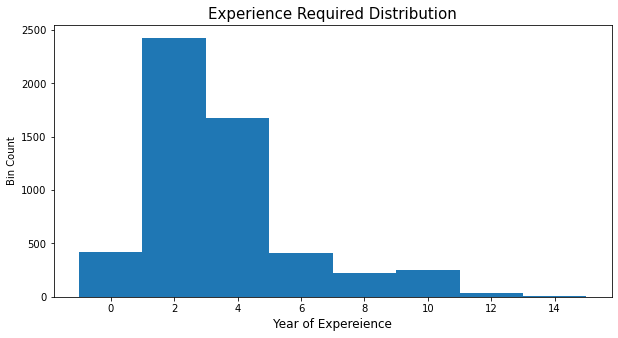

The average year of experience required is 4.09 years


In [79]:
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,18,2)), align = 'left')
plt.title('Experience Required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Year of Expereience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(experience_req),2)} years')

## Experience required 
- Average Experience required is 4+ years.
- Maximum experience required is 10+ years 


## Skill requirements
- Some of the key skill requiremt in the jd

In [80]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [81]:
# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Hadoop','SQL','SPSS','SCALA','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*', '(?i)SPSS\w*', '(?i)SCALA\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [82]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,4110,0.64
1,Python,(?i)\WPython\W,5043,0.78
2,Hadoop,(?i)\WHadoop\W?,1716,0.27
3,SQL,(?i)SQL\w*,3738,0.58
4,SPSS,(?i)SPSS\w*,370,0.06
5,SCALA,(?i)SCALA\w*,1533,0.24
6,Tableau,(?i)\WTableau\W?,1483,0.23
7,TensorFlow,(?i)\WTensorFlow\W?,899,0.14
8,Agile,(?i)\WAgile\W?,821,0.13
9,Power BI,(?i)\WPower\s?BI\W?,335,0.05


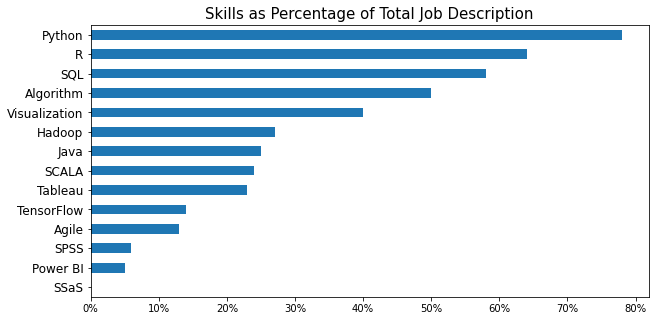

In [83]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

## Degree Requirement

In [84]:
# Define regex pattern and seach for PhD
pattern = re.compile('(?i)\WPh.?D\W')
pattern2 = re.compile('(?i)\WDoctorate\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree = {"PhD": count}

In [85]:
# Define regex pattern and seach for Master 
pattern = re.compile("(?i)\WMasters?'?s?\W")
pattern2 = re.compile('(?i)\WM.?S\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree.update({"Master":count})

In [86]:
degree = pd.DataFrame.from_dict(degree,orient='index',
                       columns=[ 'count'])
degree['ptg'] = degree['count']/len(text)

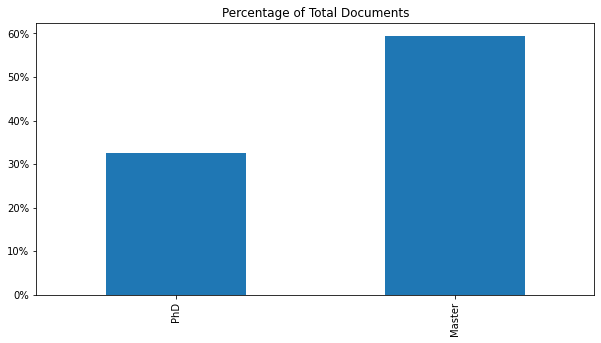

In [87]:
ax =degree['ptg'].plot(kind = "bar", figsize =(10,5))
ax.set_title('Percentage of Total Documents')
ax.set_xticklabels(degree.index)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

## Conclusion: 
- More than 50% required master's degree.
- 30% requied Phd, going for phd 
- 